# Assignment 7

####Authors:
A01732079 Benjamín Gutiérrez Padilla

A01327941 Orlando González Ortiz

A00839205 Edgar Ivan Rodríguez Medel


This project presents the algorithm that was used to obtain the results presented in the Assignment 7 document.

Here, each of the steps, techniques and models that were used will be specifically documented.

Step 0 is to load the drive folder where the data is stored to train and test the algorithm, the path must be the one that corresponds to whoever runs the algorithm.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# /content/drive/MyDrive/Machine Learning/MCC/Assignment 7/nlp-getting-started

Mounted at /content/drive


Installation of libraries needed.

In [ ]:
!pip install nltk
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.5 MB/s eta 0:00:00


Installation of necessary packages inside the nltk library

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

The following block presents the basic cleaning of the data set for texts, which allow us to better represent each text, reducing the margin of error we can obtain when modifying each of the tweets.

The process includes: converting all text to lower case, removing URLS, removing special characters and numbers, lemmatization and converting to antonyms to avoid words like "not".

The texts of the train and test are also joined to be able to tokenize all possible words.

We split the dataset found in "train.csv" into train and test, since the "test.csv" file does not contain the "target" values. In this way we can apply efficacy tests in our test.


In [ ]:
# Fetch & clean dataset 

# Import Libraries needed
import nltk
from spellchecker import SpellChecker
import pandas as pd
from nltk.corpus import stopwords 
from nltk.corpus import wordnet

from nltk.stem import WordNetLemmatizer 
# import nltk 
import re
import numpy as np  
import pandas as pd 

# Load data
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/MCC/Assignment 7/nlp-getting-started/train.csv")
# test_df = pd.read_csv("/content/drive/MyDrive/Machine Learning/MCC/Assignment 7/nlp-getting-started/test.csv")

# Divide data into train and test
train_df = df.sample(frac=0.8,random_state=25)
test_df = df.drop(train_df.index)

# Function to convert a sentence to antonym
def convert_to_antonym(sentence):
    words = nltk.word_tokenize(sentence)
    new_words = []
    temp_word = ''
    for word in words:
        antonyms = []
        if word == 'not':
            temp_word = 'not_'
        elif temp_word == 'not_':
            for syn in wordnet.synsets(word):
                for s in syn.lemmas():
                    for a in s.antonyms():
                        antonyms.append(a.name())
            if len(antonyms) >= 1:
                word = antonyms[0]
            else:
                word = temp_word + word # when antonym is not found, it will
                                    # remain not_happy
            
            temp_word = ''
        if word != 'not':
            new_words.append(word)
    return ' '.join(new_words)

# Function form lemmatizing        
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV }
def lemma_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word ,wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

# Function for general cleaning of text, including the above functions
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
  """
    text = text.lower() # lowercase text
    text= re.sub(r'[^\w\s#]',' ',text) #Removing every thing other than space, word and hash
    text  = re.sub(r"https?://\S+|www\.\S+", "", text )
    text  = re.sub(r"http?://\S+|www\.\S+", "", text )
    text= re.sub(r'[0-9]',' ',text)
    text = lemma_words(text)
    text = convert_to_antonym(text)
    text = re.sub(' +', ' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text    
    return text

# Apply cleaning to data
train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)

# Convert text to Dataframe
sentences= pd.DataFrame(columns=['text'])

# Concatenate training and testing text
sentences['text']= pd.concat([train_df["text"], test_df["text"]])

# Tokenize all texts
from collections import defaultdict
tokens_list = [row.split() for row in sentences['text']]

In [ ]:
print(tokens_list)

[['dan', 'hughes', 'be', 'take', 'off', 'on', 'a', 'stretcher', 'after', 'danielle', 'robinson', 'collide', 'ou_wbball', 'hope', 'they', 'be', 'both', 'ok', 'he', 'call', 'some', 'game', 'over', 'year'], ['when', 'you', 'don', 't', 'know', 'which', 'way', 'an', 'ambulance', 'be', 'come', 'from', 'lt', 'lt'], ['this', 'real', 'shit', 'will', 'damage', 'a', 'bitch'], ['ambulance', 'sprinter', 'automatic', 'frontline', 'vehicle', 'choice', 'of', 'lez', 'compliant', 'ebay', 'http', 't', 'co', 'kp', 'lf', 'aute'], ['i', 'like', 'a', 'youtube', 'video', 'http', 't', 'co', 'ki', 'ykrs', 'fi', 'minecraft', 'night', 'lucky', 'block', 'mod', 'bob', 'apocalypse', 'wither', 'amp', 'more', 'mod', 'showcase'], ['ianokavo', 'he', 's', 'still', 'traumatise'], ['#', 'foodscare', '#', 'offers', 'go', '#', 'nestleindia', 'slip', 'into', 'loss', 'after', '#', 'magginoodle', '#', 'ban', 'unsafe', 'and', 'hazardous', 'for', '#', 'humanconsumption'], ['anyway', 'me', 'mateo', 'just', 'doesnt', 'exist', 'he',

In [ ]:
print(len(tokens_list))
print(len(train_df))
print(len(test_df))

7613
6090
1523


## Word Embedding Techniques

In the next section we use "Word Embedding Techniques" to represent words and texts as dense numeric vectors in one dimensional space.

We decided to use Word2Vec techniques. Mainly Skip Gram and CBOW to train them with the vocabulary from our previously obtained token list.

We also did a comparison with a pre-trained Google dictionary with many more words.

### Wor2vec Skip gram

In [ ]:
# Import Libraries
from gensim.models import Word2Vec
from time import time
t = time()
# initialize skipgram model
sg_model = Word2Vec(min_count=2,
                    window=2,vector_size=300, sg = 1,
                    sample=5e-5, alpha=0.05, 
                    min_alpha=0.0005,negative=20 )

# build model vocabulary
sg_model.build_vocab(tokens_list)

# train the model
sg_model.train(tokens_list, total_examples=sg_model.corpus_count, epochs=30, report_delay=1)

print('Time to build Skip gram model vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build Skip gram model vocab: 0.35 mins


In [ ]:
sg_model.wv.__getitem__('hope')

array([ 0.41603428, -0.07984393,  0.2537538 ,  0.11632733, -0.08141011,
        0.03084152, -0.11202271,  0.46504638,  0.28825444, -0.214989  ,
       -0.17394394, -0.0517242 ,  0.22020715, -0.16917571, -0.19102027,
       -0.17395781, -0.16724525, -0.03336303, -0.06800783, -0.27238965,
       -0.15471448, -0.10624465,  0.03698597,  0.1581271 ,  0.24321546,
        0.08738548,  0.10505325, -0.20826253,  0.12411003, -0.187258  ,
       -0.04042406,  0.11703307,  0.05763202,  0.08746125, -0.31700116,
       -0.35700756,  0.0608271 , -0.08406017, -0.05353137, -0.22735043,
       -0.01764147, -0.0842397 ,  0.06438372,  0.08201373,  0.06358597,
       -0.1379442 ,  0.082319  ,  0.30472502,  0.09759876, -0.06597121,
        0.23474628,  0.14177024,  0.11589848, -0.06078684,  0.26713598,
        0.26799786,  0.03496316,  0.2925495 , -0.18186542, -0.22890829,
        0.17346253,  0.16393065,  0.2418325 ,  0.37982774, -0.07990971,
        0.06323288,  0.3021488 ,  0.10128568, -0.04645115, -0.13

## CBOW

In [ ]:
#### Building CBOW wordvectors
from gensim.models import Word2Vec
from time import time
t = time()
# initialize
cbow_model = Word2Vec(min_count=2,window=2,vector_size=300, sg = 0,sample=5e-5, alpha=0.05, min_alpha=0.0005, 
                     negative=20 )
# build model vocabulary
cbow_model.build_vocab(tokens_list)

# train the model
cbow_model.train(tokens_list, total_examples=cbow_model.corpus_count, epochs=30, report_delay=1)

print('Time to build CBOW model vocab: {} mins'.format(round((time() - t) / 60, 2)))


Time to build CBOW model vocab: 0.17 mins


## Google Dict

In [ ]:
#fetching  pretrain wordvector
from gensim.models.keyedvectors import KeyedVectors
t = time()
# pretrained_w2vec_embedding = KeyedVectors.load_word2vec_format('../input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin', binary=True)

# The data was already downloaded and stored in Drive
pretrained_w2vec_embedding = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Machine Learning/MCC/Assignment 7/nlp-getting-started/GoogleNews-vectors-negative300.bin', binary=True)


print('Time to fetch  pretrain  Word2Vec model vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to fetch  pretrain  Word2Vec model vocab: 1.57 mins


## Keras Embedding layer

In this section we convert the Word Embedding vectors to a matrix using Keras to learn vector representations of words in a machine learning model.

This technique is applied to the three previous Word Embedding models


In [ ]:
# using keras built in utilities
# tokenizing using keras  tokenizer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tqdm import tqdm
from keras.layers import Embedding
tokenizer_obj=Tokenizer()
# to builds the word index
tokenizer_obj.fit_on_texts(tokens_list)
# to turns strings into lists of integer indices.
sequences=tokenizer_obj.texts_to_sequences(tokens_list)
# defining maximum length of sequence 
MAX_LEN= 50
# pad_sequences is used to ensure that all sequences in a list have the same length
tweet_pad= pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

# segregating text & train from corpu
x_train = tweet_pad[:6090] #7613
x_test = tweet_pad[6090:]

targets =  [target for target in train_df['target']]

# set of all word and their sequence no
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))
vocab_size = len(word_index)+1
print(targets)
targetn=np.array(targets)

Number of unique words: 20394
[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 

In [ ]:
# function to generate embeeding layer weights i.e. embeeding_matrix

def generate_word2vec_embeeding_matrix(word_vector_model, dimension, vocab_size= vocab_size, word_index =word_index):
    embedding_matrix=np.zeros((vocab_size,dimension))
    for word,i in tqdm(word_index.items()):
        if i > vocab_size:
            continue
        if word in word_vector_model.wv:  
            emb_vec=word_vector_model.wv.__getitem__(word)
            embedding_matrix[i]=emb_vec
    return embedding_matrix

def generate_pretrained_embeeding_matrix(word_vector_model, dimension, vocab_size= vocab_size, word_index =word_index):
    embedding_matrix=np.zeros((vocab_size,dimension))
    for word,i in tqdm(word_index.items()):
        if i > vocab_size:
            continue
        if word in word_vector_model:  
            emb_vec=word_vector_model[word]
            embedding_matrix[i]=emb_vec
    return embedding_matrix

### Trained SG

Keras Embedding to trained Skip Gramm

In [ ]:
from keras.layers import Embedding

embedding_matrix_sg_trained = generate_word2vec_embeeding_matrix(sg_model, dimension = 300)

embedding_layer_sg_trained = Embedding(vocab_size, output_dim= 300, weights=[embedding_matrix_sg_trained], 
                                     input_length=MAX_LEN, trainable=False)

100%|██████████| 20394/20394 [00:00<00:00, 369967.20it/s]


### Pre-Trained  Word2Vec

Keras Embedding to pre-trained Word2Vec from Google

In [ ]:
# pre trainde word2vec  
embedding_matrix_w2v_pretrained = generate_pretrained_embeeding_matrix(pretrained_w2vec_embedding, dimension =300)    

embedding_layer_w2v_pretrained = Embedding(vocab_size, output_dim= 300, weights=[embedding_matrix_w2v_pretrained], 
                                     input_length=MAX_LEN, trainable=False)

100%|██████████| 20394/20394 [00:00<00:00, 134531.52it/s]


### Trained  CBOW

Keras Embedding to trained CBOW Model

In [ ]:
embedding_matrix_cbow_trained = generate_word2vec_embeeding_matrix(cbow_model, dimension = 300)

embedding_layer_cbow_trained = Embedding(vocab_size, output_dim= 300, weights=[embedding_matrix_cbow_trained], 
                                     input_length=MAX_LEN, trainable=False)

100%|██████████| 20394/20394 [00:00<00:00, 242833.64it/s]


## 4. Deep Learning Models

One of our main tests was to test the three embedding models generated before (Skip Gramm (SG), CBOW and pretrained Word2Vec) and generate results with different Deep Learning models.

The models we used were DNN, CNN, RNN, LSTM, and GRU.

In this way we obtained 18 different results that we show in graphs that are better explained in the document.

The following lines of code were executed 3 times, one for each embedding model. To repeat our process it is necessary to do this execution uncommenting the model that is needed. 

For each of the results of the deep learning models, 2 graphs were generated, one to represent the accuracy during each epoch and another to show the loss.

In [ ]:
# Declare embeeding layer of your choics 

# Uncomment the model you want to test
embedding_layer = embedding_layer_sg_trained

#embedding_layer = embedding_layer_w2v_pretrained

#embedding_layer = embedding_layer_cbow_trained

In [ ]:
import keras
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=5),
    
]

### Basic DNN


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
dnn_model = Sequential()
dnn_model.add(embedding_layer)
dnn_model.add(Flatten())
dnn_model.add(Dense(1, activation='sigmoid'))

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

dnn_model.summary()

history_dnn = dnn_model.fit(x_train,  y = targetn,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2, callbacks= my_callbacks)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           6118500   
                                                                 
 flatten_8 (Flatten)         (None, 15000)             0         
                                                                 
 dense_28 (Dense)            (None, 1)                 15001     
                                                                 
Total params: 6,133,501
Trainable params: 15,001
Non-trainable params: 6,118,500
_________________________________________________________________
Epoch 1/50
153/153 [==============================] - 1s 5ms/step - loss: 0.5479 - acc: 0.7336 - val_loss: 0.4957 - val_acc: 0.7685
Epoch 2/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4550 - acc: 0.8028 - val_loss: 0.4854 - val_acc: 0.7709
Epoch 3/50
153/153 [==================

In [ ]:
print(len(x_train))

6090


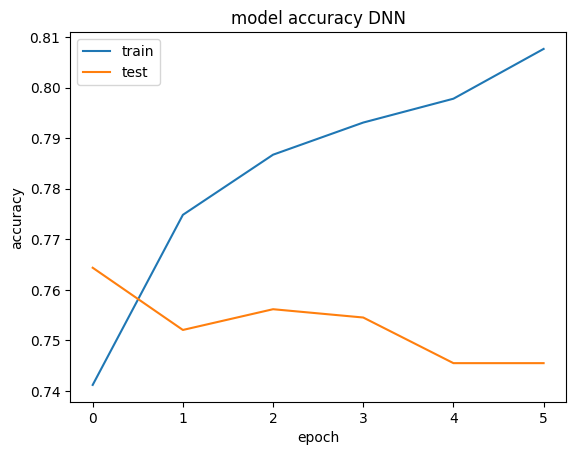

In [ ]:
import matplotlib.pyplot as plt

#print(history.history['loss'])

plt.plot(history_dnn.history['acc'])
plt.plot(history_dnn.history['val_acc'])
plt.title('model accuracy DNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xlim([0,1])
plt.show()

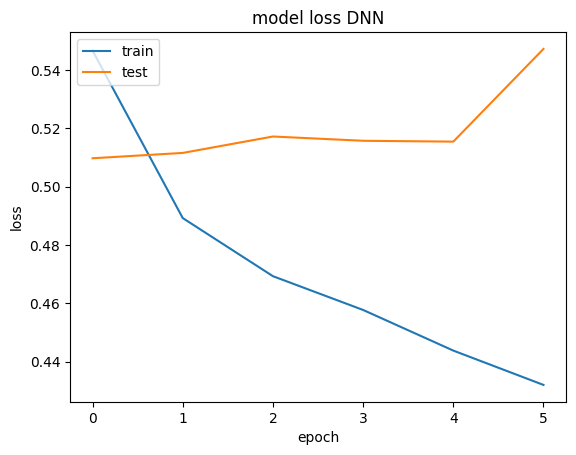

In [ ]:
plt.plot(history_dnn.history['loss'])
plt.plot(history_dnn.history['val_loss'])
plt.title('model loss DNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### CNN

In [ ]:
#CNN is suitable for image processing
import keras
cnn_model = Sequential()
# note : below we add embedding layer
cnn_model.add(embedding_layer)
cnn_model.add(keras.layers.Dropout(0.2))
cnn_model.add(keras.layers.Conv1D(3,3, padding='valid',activation='relu', strides=1))
cnn_model.add(keras.layers.GlobalMaxPooling1D())
cnn_model.add(keras.layers.Dense(20))
cnn_model.add(keras.layers.Dropout(0.2))
cnn_model.add(keras.layers.Activation('relu'))
cnn_model.add(keras.layers.Dense(1))
cnn_model.add(keras.layers.Activation('sigmoid'))

# Get model summary
cnn_model.summary()
cnn_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# compile the model
history = cnn_model.fit(x_train,  y = targetn,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           6118500   
                                                                 
 dropout_8 (Dropout)         (None, 50, 300)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 48, 3)             2703      
                                                                 
 global_max_pooling1d_4 (Glo  (None, 3)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_29 (Dense)            (None, 20)                80        
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                     

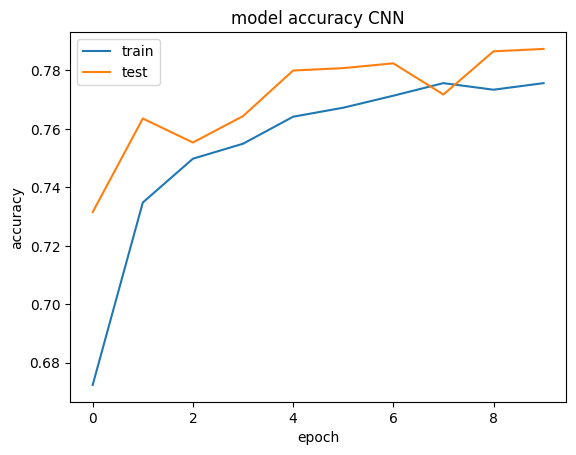

In [ ]:
import matplotlib.pyplot as plt

#print(history.history['loss'])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xlim([0,1])
plt.show()

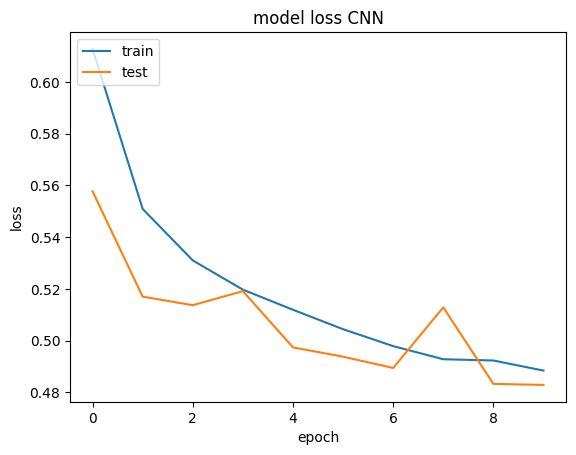

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
rnn_model = Sequential()
# note : below we add embedding layer
rnn_model.add(embedding_layer)
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = rnn_model.fit(x_train, y = targetn,epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
153/153 [==============================] - 4s 18ms/step - loss: 0.6193 - acc: 0.6691 - val_loss: 0.6833 - val_acc: 0.5837
Epoch 2/10
153/153 [==============================] - 3s 22ms/step - loss: 0.5823 - acc: 0.7071 - val_loss: 0.5899 - val_acc: 0.6897
Epoch 3/10
153/153 [==============================] - 3s 22ms/step - loss: 0.5505 - acc: 0.7440 - val_loss: 0.5493 - val_acc: 0.7652
Epoch 4/10
153/153 [==============================] - 3s 17ms/step - loss: 0.5315 - acc: 0.7605 - val_loss: 0.5591 - val_acc: 0.7217
Epoch 5/10
153/153 [==============================] - 3s 17ms/step - loss: 0.5520 - acc: 0.7342 - val_loss: 0.6352 - val_acc: 0.6782
Epoch 6/10
153/153 [==============================] - 3s 17ms/step - loss: 0.5502 - acc: 0.7461 - val_loss: 0.7646 - val_acc: 0.5829
Epoch 7/10
153/153 [==============================] - 4s 27ms/step - loss: 0.5338 - acc: 0.7525 - val_loss: 0.5516 - val_acc: 0.7594
Epoch 8/10
153/153 [==============================] - 3s 20ms/step - 

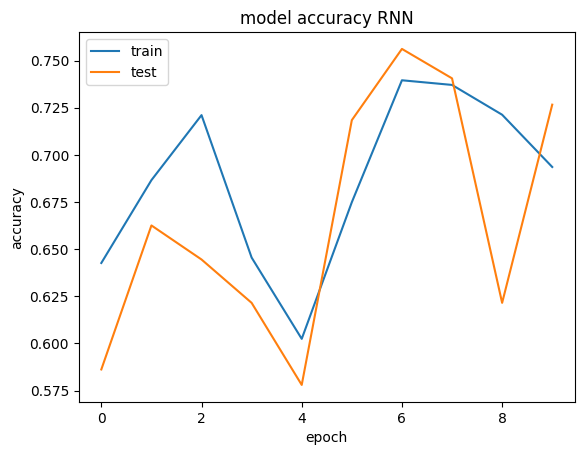

In [ ]:
import matplotlib.pyplot as plt

#print(history.history['loss'])

plt.plot(history_rnn.history['acc'])
plt.plot(history_rnn.history['val_acc'])
plt.title('model accuracy RNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

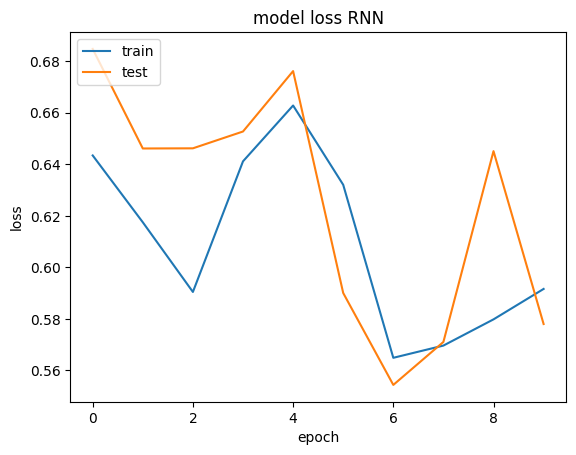

In [ ]:
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('model loss RNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Recurrent Neural Network -LSTM

In [ ]:
from keras.layers import LSTM
lstm_model = Sequential()
# note : below we add embedding layer
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_lstm = lstm_model.fit(x_train, y = targetn,epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
153/153 [==============================] - 11s 61ms/step - loss: 0.6101 - acc: 0.6679 - val_loss: 0.6213 - val_acc: 0.6888
Epoch 2/10
153/153 [==============================] - 5s 33ms/step - loss: 0.5146 - acc: 0.7763 - val_loss: 0.5217 - val_acc: 0.7677
Epoch 3/10
153/153 [==============================] - 7s 49ms/step - loss: 0.4918 - acc: 0.7826 - val_loss: 0.5268 - val_acc: 0.7578
Epoch 4/10
153/153 [==============================] - 6s 37ms/step - loss: 0.4801 - acc: 0.7814 - val_loss: 0.6858 - val_acc: 0.7110
Epoch 5/10
153/153 [==============================] - 5s 35ms/step - loss: 0.4640 - acc: 0.7902 - val_loss: 0.4881 - val_acc: 0.7865
Epoch 6/10
153/153 [==============================] - 7s 46ms/step - loss: 0.4548 - acc: 0.7991 - val_loss: 0.4738 - val_acc: 0.7865
Epoch 7/10
153/153 [==============================] - 5s 36ms/step - loss: 0.4483 - acc: 0.7999 - val_loss: 0.4869 - val_acc: 0.7890
Epoch 8/10
153/153 [==============================] - 7s 46ms/step -

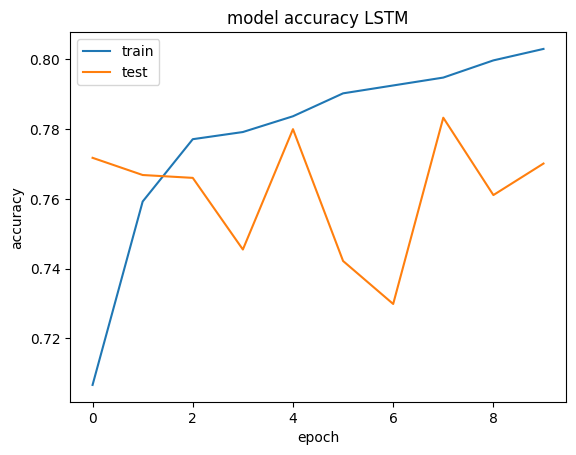

In [ ]:
import matplotlib.pyplot as plt

#print(history.history['loss'])

plt.plot(history_lstm.history['acc'])
plt.plot(history_lstm.history['val_acc'])
plt.title('model accuracy LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

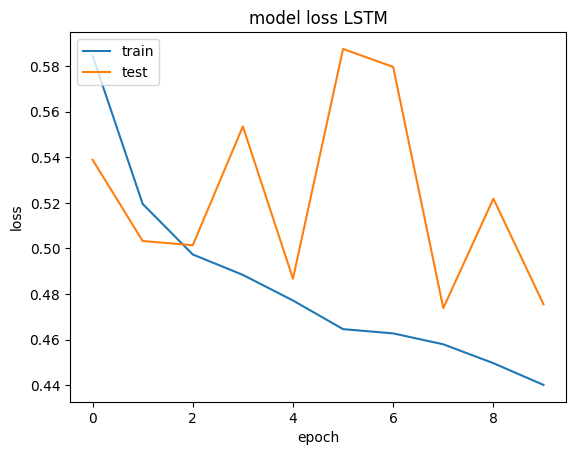

In [ ]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model loss LSTM')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Recurrent Neural Network – GRU 

In [ ]:
from keras.layers import GRU
gru_model = Sequential()
# note : below we add embedding layer
gru_model.add(embedding_layer)
gru_model.add(GRU(32))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_gru = gru_model.fit(x_train, y = targetn,epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
153/153 [==============================] - 10s 51ms/step - loss: 0.6852 - acc: 0.5679 - val_loss: 0.6822 - val_acc: 0.5739
Epoch 2/10
153/153 [==============================] - 5s 35ms/step - loss: 0.6843 - acc: 0.5681 - val_loss: 0.6826 - val_acc: 0.5739
Epoch 3/10
153/153 [==============================] - 6s 38ms/step - loss: 0.6843 - acc: 0.5681 - val_loss: 0.6825 - val_acc: 0.5739
Epoch 4/10
153/153 [==============================] - 7s 44ms/step - loss: 0.6842 - acc: 0.5681 - val_loss: 0.6829 - val_acc: 0.5739
Epoch 5/10
153/153 [==============================] - 6s 36ms/step - loss: 0.6841 - acc: 0.5681 - val_loss: 0.6829 - val_acc: 0.5739
Epoch 6/10
153/153 [==============================] - 7s 47ms/step - loss: 0.6841 - acc: 0.5681 - val_loss: 0.6822 - val_acc: 0.5739
Epoch 7/10
153/153 [==============================] - 6s 36ms/step - loss: 0.6842 - acc: 0.5681 - val_loss: 0.6826 - val_acc: 0.5739
Epoch 8/10
153/153 [==============================] - 7s 44ms/step -

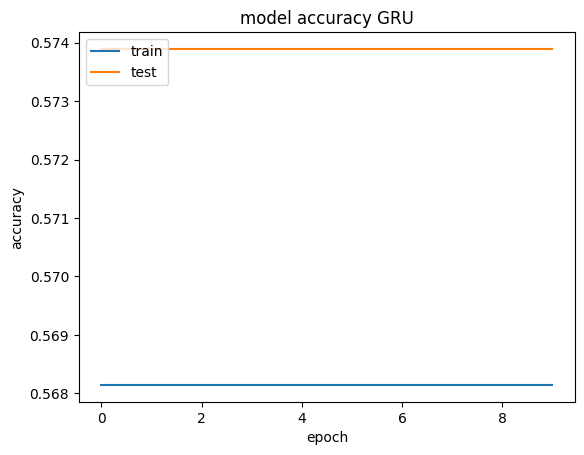

In [ ]:
plt.plot(history_gru.history['acc'])
plt.plot(history_gru.history['val_acc'])
plt.title('model accuracy GRU')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

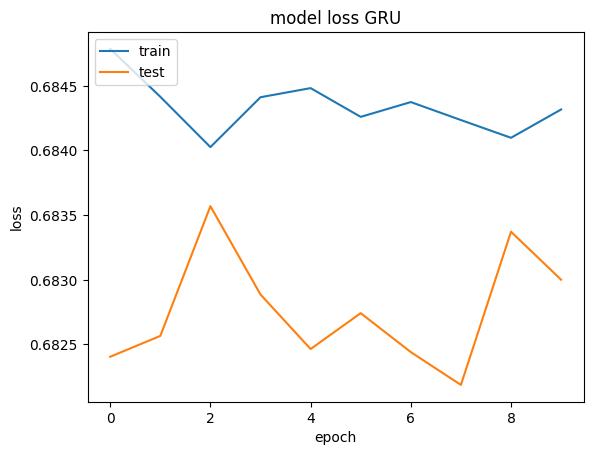

In [ ]:
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('model loss GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# test = pd.read_csv("/content/drive/MyDrive/Machine Learning/MCC/Assignment 7/nlp-getting-started/sample_submission.csv")
test = test_df
test=test['target']
print(test)


10      1
11      1
14      1
20      0
32      0
       ..
7595    1
7596    1
7599    1
7604    1
7605    1
Name: target, Length: 1523, dtype: int64


###  Target Prediction  

In this subsection we made the predictions of the test data with each of the results of the DL models.

In [ ]:
print(len(x_test))
print(x_test)

1523
[[ 570   62  236 ...    0    0    0]
 [ 847  555 3243 ...    0    0    0]
 [ 207    9  224 ...    0    0    0]
 ...
 [   4  332    8 ...    0    0    0]
 [   4 1271  213 ...    0    0    0]
 [  17    5 2681 ...    0    0    0]]


This code block was repeated 18 times, one for each embedding combination - Deep Learning Model

In [ ]:
# lets predict target values for test set
# Change the DL Model
model =  gru_model
model.predict
raw_preds = model.predict(x_test)
preds = raw_preds.round().astype(int)
pd.DataFrame(preds).to_csv("gru_sg.csv")
preds
#plt.plot(preds)
#plt.show()


48/48 [==============================] - 1s 10ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
test_df.to_csv("testOriginal.csv")

##BERT

Up to this point we have generated 18 different models combining different techniques, now we will use one of the most recognized techniques, the BERT model.

First we load the pretrained bert layer, and then the tokenization by BERT

In [ ]:
# install tesorflow bert package
!pip install bert-for-tf2

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert

#Loding pretrained bert layer
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)


# Loading tokenizer from the bert layer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocab_file, do_lower_case)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30515 sha256=8a8d882e951725bea12fc2ee06ecb3bec32aa435d06f994cc97631891fb9e135
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19457 sha256=641c9158f23c6f0d70a0c3620ab3fb6231b15e6de94fad1f9271ad4224a8ca0d
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7892 sha256=48e51d46645ea6182754fac331f8f905c0d26160258f033a425f9f7ca7efd45b
  Sto

We execute the function for Bert's encoder

In [ ]:
# function to encode the text into tokens, masks, and segment flags
import numpy as np
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

MAX_LEN = 64

# encode train set 
train_input = bert_encode(train_df.text.values, tokenizer, max_len=MAX_LEN)
# encode  test set 
test_input = bert_encode(test_df.text.values, tokenizer, max_len= MAX_LEN )
train_labels = train_df.target.values

In this part we train the BERT model using the Keras library, this model is the final one prior to the predictions

In [ ]:
# first define input for token, mask and segment id  
from tensorflow.keras.layers import  Input
input_word_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_word_ids")
input_mask = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_mask")
segment_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="segment_ids")

#  output  
from tensorflow.keras.layers import Dense
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])  
clf_output = sequence_output[:, 0, :]
out = Dense(1, activation='sigmoid')(clf_output)   

# intilize model
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
model.compile(Adam(lr=2e-6), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# train
train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=2,
    batch_size=32
)

model.save('model.h5')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 64)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 64)]         0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 64)]         0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 64, 768)]                 'input_mask[0][0]',         

Subsequently, we make the predictions of the Test Data with the model created from BERT

In [ ]:
test_pred = model.predict(test_input)
preds = test_pred.round().astype(int)
pd.DataFrame(preds).to_csv("bert.csv")
preds

48/48 [==============================] - 353s 7s/step


array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
train_history.history

{'loss': [0.6018461585044861, 0.5122567415237427],
 'accuracy': [0.6847290396690369, 0.7582101821899414],
 'val_loss': [0.5346657633781433, 0.5020932555198669],
 'val_accuracy': [0.7471264600753784, 0.7635468244552612]}

Finally we reproduce the graphs that we generated with the other Deep Learning models (Accuracy and Loss) but now with the BERT model

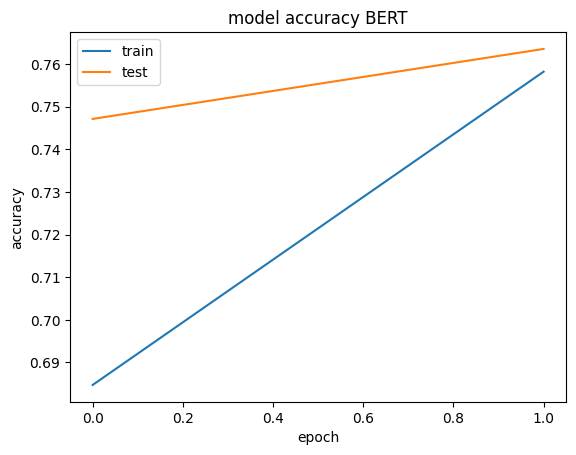

In [ ]:
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('model accuracy BERT')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

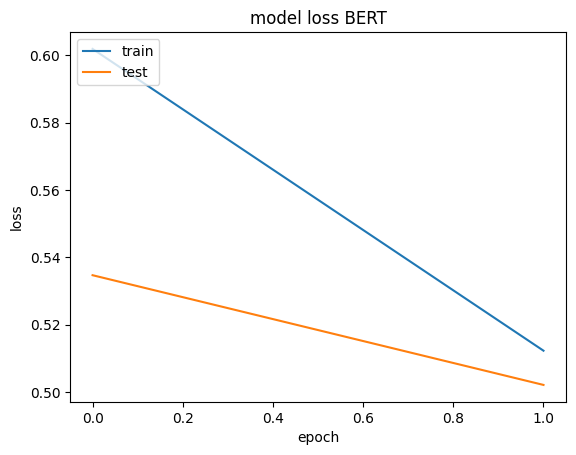

In [ ]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss BERT')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

If you follow the instructions in this notebook, you will be able to reproduce the methodology that we decided to use to compare each of the generated models.

For further discussion of results and specific comparison between graphs, the document can be consulted.